In [2]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing import event_accumulator

Finding the best optimization values:

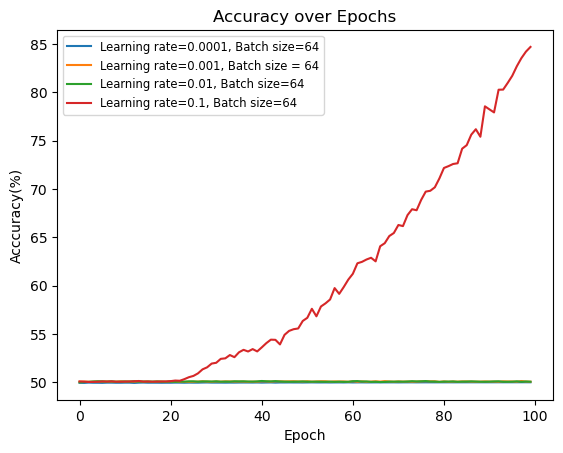

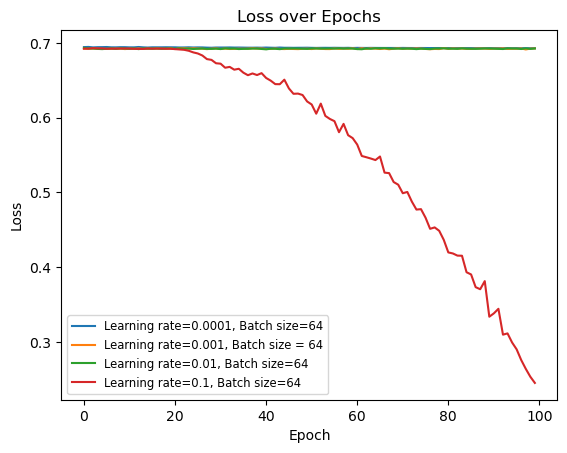

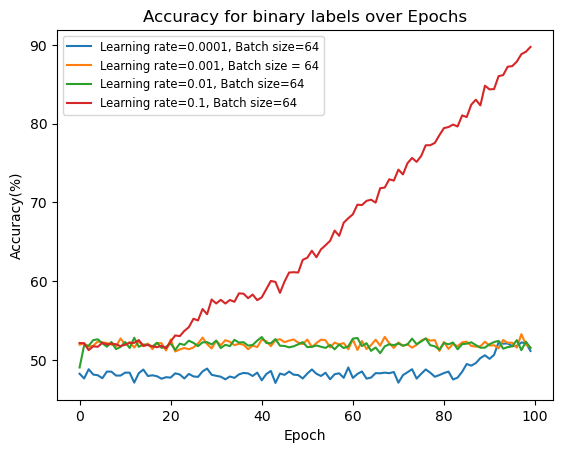

In [6]:
# Path to the main directory where all runs are stored
main_log_dir = r"A:\3rd_Year_Project\Project_code\runs\optimisation\Current"
# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Accuracy'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel("Acccuracy(%)")
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Loss'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel(target_tag)
#plt.ylim(0.35, 0.6)
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Accuracy for binary labels'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel("Accuracy(%)")
#plt.ylim(74, 85)
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

Training curves

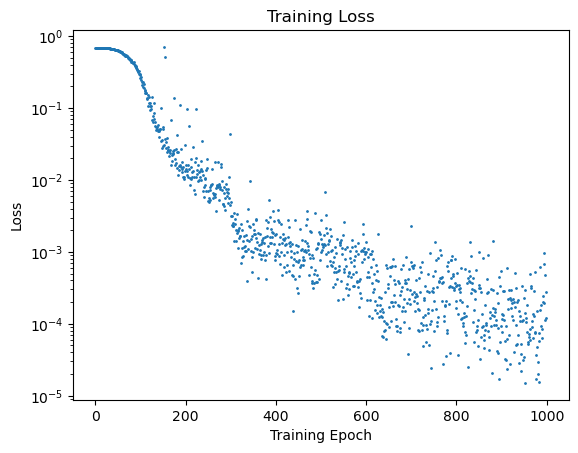

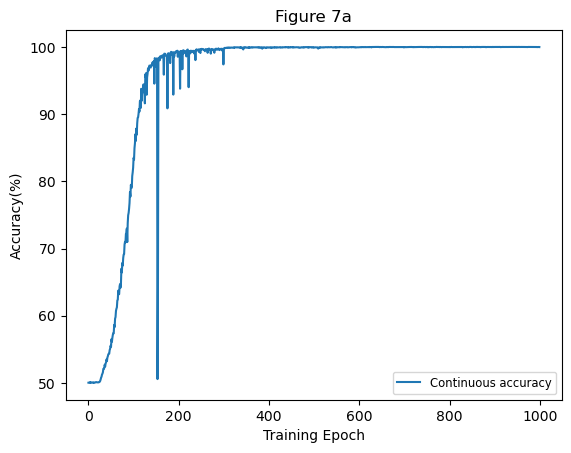

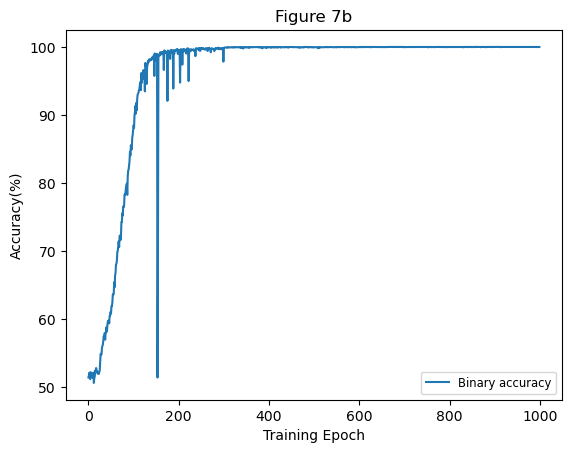

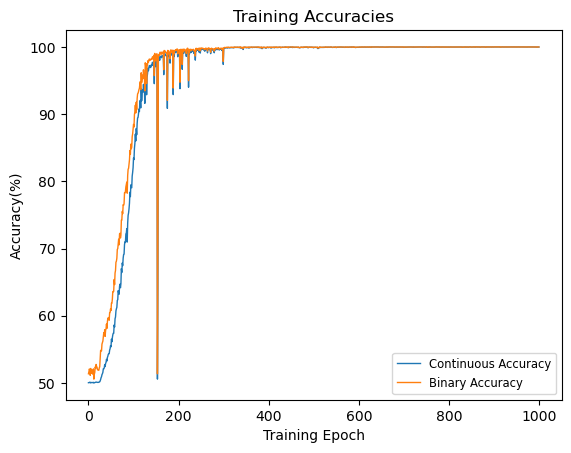

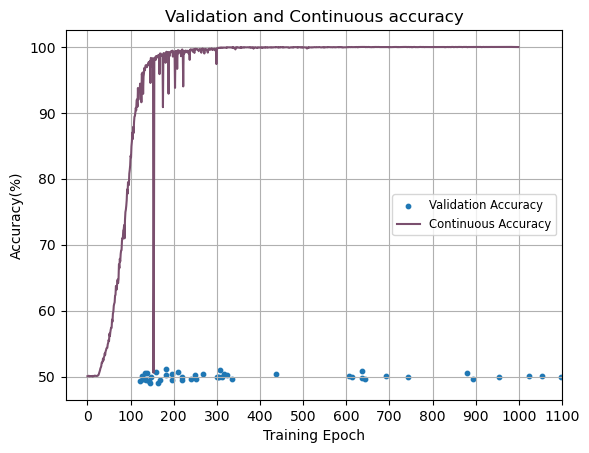

In [9]:
# Path to the main directory where all runs are stored
main_log_dir = (r"A:\3rd_Year_Project\Project_code\runs\Training")#\lr=0.1(300drop0.7), bs=64, TrainBinary-TrainBinary")
run_name = (r"lr=0.1(300drop0.7), bs=64, TrainBinary-TrainBinary")
# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')

#load in the actual page?
run_dir = os.path.join(main_log_dir, run_name)
ea = event_accumulator.EventAccumulator(run_dir)
ea.Reload()

#load in each of the subjects of interest
events = ea.Scalars("Accuracy")
steps50 = [e.step for e in events]
#   X-axis here
steps = np.array(steps50)
steps = steps[:1000]

#   Continuous accuracy
Acc = [e.value for e in events]
Acc = np.array(Acc)
Acc = Acc[:1000]

#   Loss
events = ea.Scalars("Loss")
hey_there = [e.value for e in events]
hey_there = np.array(hey_there)
hey_there = hey_there[:1000]

#   Binary Accuracy
events = ea.Scalars('Accuracy for binary labels')
values2 = [e.value for e in events]
values2 = np.array(values2)
values2 = values2[:1000]

#   validation accuracy
events = ea.Scalars('Validation Accuracy')
stepsVal = [e.step for e in events]
stepsVal = np.array(stepsVal)
stepsVal = stepsVal[:1000]
values = [e.value for e in events]
values = np.array(values)
values = values[:1000]

#Plot the graphs
#loss
plt.title("Training Loss")
plt.scatter(steps, hey_there, s=1)
plt.xlabel('Training Epoch')
plt.ylabel("Loss")
plt.yscale('log')
#plt.xlim(-50, 1050)
plt.show()
#Continuous accuracy
plt.plot(steps, Acc, label = "Continuous accuracy")
plt.title("Figure 7a")
plt.legend(loc='best', fontsize='small')
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
#plt.xlim(-50, 1050)
plt.show()
#Binary Accuracy
plt.plot(steps, values2, label = "Binary accuracy")
plt.title('Figure 7b')
plt.legend(loc='best', fontsize='small')
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy(%)')
#plt.xlim(-50, 1050)
plt.show()

#both accuracies in one graph
plt.plot(steps, Acc, label="Continuous Accuracy", lw=1)
plt.plot(steps, values2, label="Binary Accuracy", lw=1)
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
plt.title("Training Accuracies")
plt.legend(loc='best', fontsize='small')
plt.xlim(-50, 1050)
plt.show()

#validation accuracy
#plt.plot(stepsVal, values)
plt.scatter(stepsVal, values, label = "Validation Accuracy", s=10)
plt.plot(steps, Acc, label="Continuous Accuracy", color="#7a4f6e")
plt.title(f'Validation and Continuous accuracy')
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
plt.xlim(-50, 1050)
plt.xticks(np.arange(0, len(steps50), 100))
plt.grid(True)
plt.legend(loc='best', fontsize='small')
plt.show()

Accuracy per framenumber

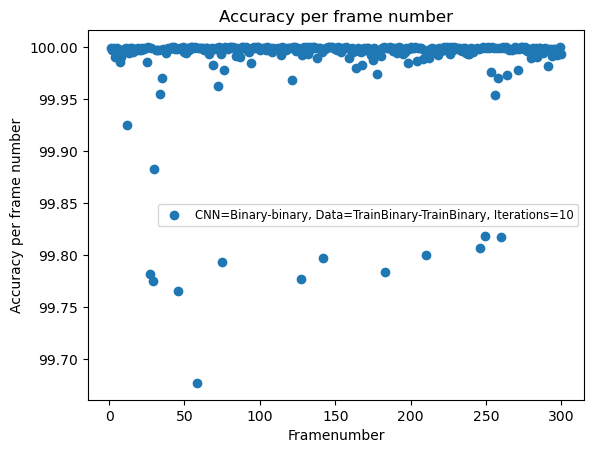

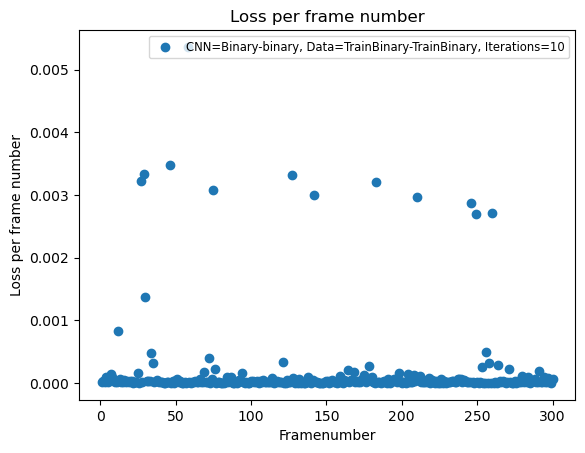

In [17]:
# Path to the main directory where all runs are stored
main_log_dir = r"A:\3rd_Year_Project\Project_code\runs\framenumber"
#tag of what we want to look at
target_tag = 'Accuracy per frame number'

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.scatter(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag}')
plt.xlabel('Framenumber')
plt.ylabel(target_tag)
#plt.ylim(99.6, 100)
plt.legend(loc='best', fontsize='small')
plt.show()


target_tag = 'Loss per frame number'

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.scatter(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag}')
plt.xlabel('Framenumber')
plt.ylabel(target_tag)
#plt.ylim(0, 0.00005)
plt.legend(loc='best', fontsize='small')
plt.show()

['frameNumber', 'Accuracy', 'stdAcc', 'Loss', 'LossStd']


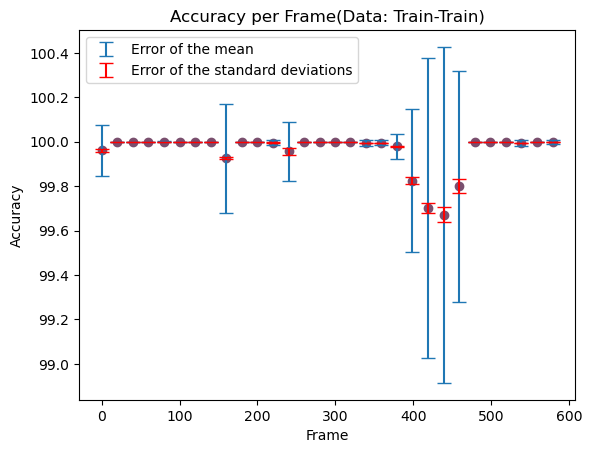

In [14]:
#Getting the graphs from the
framenumber_file = np.load("Acc_per_frame_CNN=15.npzAlmost, Data=TrainBinary-TrainBinary, Iterations=100.npz")
print(framenumber_file.files)

framenumber = framenumber_file["frameNumber"]
sorted_framenumber = np.argsort(framenumber) #tells different elements in framenumber to go to different indexes such that framenumebr is ascending
framenumber = framenumber[sorted_framenumber]
accuracy = framenumber_file["Accuracy"]
accuracy = accuracy[sorted_framenumber]
stdAcc = framenumber_file["stdAcc"]
stdAcc = stdAcc[sorted_framenumber]
loss = framenumber_file["Loss"]
loss = loss[sorted_framenumber]
lossstd = framenumber_file["LossStd"]
lossstd = lossstd[sorted_framenumber]#reorder all of the others such that they are all perfectly aligned to framenumber

no_of_bins = 30
max_frame = np.max(framenumber)
no_needed = max_frame/(no_of_bins)
binned_framenumber = np.round((np.round(framenumber/no_needed))*no_needed)
#print(binned_framenumber)

prev=framenumber[0]
bin_frame = []
mean_acc = []
std_acc = []
std_acc1 = []
meanAcc = []
StdAcc = []
stdAcc1 = []

for i, value in enumerate(binned_framenumber):
    if value != prev:
        bin_frame.append(prev)

        meanAcc.append(np.mean(mean_acc))
        StdAcc.append(np.std(mean_acc))
        stdAcc1.append(
            np.sqrt(
            np.sum(
            np.array(std_acc1)**2
            ))
        /(np.mean(mean_acc)))

        mean_acc = []
        std_acc = []
        std_acc1 = []
        prev=value
    if value == prev:
        mean_acc.append(accuracy[i])
        std_acc.append(accuracy[i])
        std_acc1.append(stdAcc[i])

#print(len(meanAcc))
#print(len(bin_frame))
#print(len(stdAcc1))

plt.title(f'Accuracy per Frame(Data: Train-Train)')
plt.xlabel('Frame')
plt.ylabel("Accuracy")
#plt.xlim(0, 300)
#plt.ylim(80, 100)
plt.errorbar(bin_frame, meanAcc, yerr=StdAcc, linestyle="None", capsize=5, ecolor="#1f77b4", label="Error of the mean")
plt.errorbar(bin_frame, meanAcc, yerr=stdAcc1, linestyle="None", ecolor="red", capsize=5, label="Error of the standard deviations")
plt.scatter(bin_frame, meanAcc, color="#7a4f6e")
plt.legend()
plt.show()

#plt.title("Loss per Frame")
#plt.xlabel('Frame')
#plt.ylabel("Loss")
#plt.scatter(binned_framenumber, loss)
#plt.show()